## 问题描述
想象着，有一个房间，里面有 50 个人，每个人有 100 美元。每过一会，每个有钱的人给随机的其他人 1 美元，经过一段时间后，房间内的资金分配情况是怎样？

一般我们会认为，每个人每一轮丢失1美元的概率接近100%，得到某个人钱的概率是1/49.所以不论是得到钱还是给钱，每个人的概率都是一样的，所以会认为最终每个人的财富最终还是在100左右。但其实这不符合事实。下面通过代码和简单的数学描述来思考下。

## Python实验过程

In [1]:
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

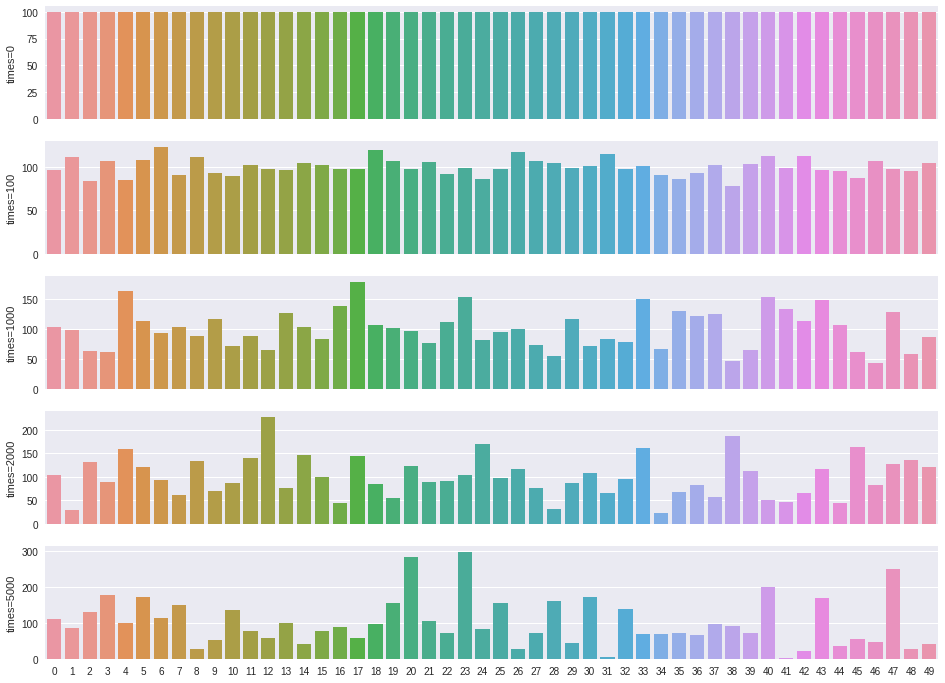

In [2]:
f, axes = plt.subplots(5, 1, figsize=(16, 12), sharex=True)
hx=np.zeros(5)
people = np.arange(50)      # 50个人
for indexOfAx, ite in enumerate([0, 100, 1000, 2000, 5000]):
    asset = np.ones(50) * 100   # 初始每人100元
    for i in range(ite):
        for index, item in enumerate(asset):
            if asset[index] > 0:
                asset[index] -= 1
                asset[rd.randint(0,49)] += 1
    sns.barplot(people, asset, ax=axes[indexOfAx])
    axes[indexOfAx].set_ylabel("times=%d" % ite)
    
    # 计算熵值
    for va in asset:
        hx[indexOfAx] += va / 5000 * math.log(2, va / 5000)
    hx[indexOfAx] *= -1
sns.barplot(people,asset)

In [3]:
# 熵值
hx

array([ 0.17718382,  0.17748537,  0.18065344,  0.18346419,  0.19165279])

## 实验结果分析
上图分别是随机给钱0, 100, 1000, 2000, 5000次的结果，可以看出最终是有一部分人特别有钱，一部分人穷的叮当响。同时，整体趋势是贫富差距加大。

在随机给别人钱的过程中，如果本人没有钱则不给。

## 数学论证
这个问题可以用信息熵来解释。信息熵表示为

$$H(X)=-\sum_{i=1}^{n} p_i \log p_i$$

log以2或自然对数e为底，区别在于熵的单位不同，分别为bit、nat。

根据最大熵理论，概率小代表熵越大，也就是证明贫富差距很大时，每个人的财富的概率分布$p_i$满足如上的两极化。

初始每个人的财富都为100/5000.假设log以2为底，此时熵为
$$H(X)=-\sum_{i=1}^{50} 0.02 \log_2 0.02$$

然后我就证明不下去了，哭）：

反正通过0.17718382,  0.17748537,  0.18065344,  0.18346419,  0.19165279，是说明熵越来越大，概率分布也比较离散化。只能分析到这儿了，还是要多读书。